<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/HomeCredit/app_baseline_02_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### application 데이터 세트에 다양한 feature engineering 수행. 
* application_train(test) 주요 feature값들의 분포도등의 EDA 수행. 
* application_train(test) 주요 feature 들의 추가적인 가공을 통한 feature engineering 수행. 

#### 라이브러리와 app 데이터 세트 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc,os,sys
import random

from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 30)

In [ ]:
# kaggle json
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c home-credit-default-risk

 99% 96.0M/96.7M [00:03<00:00, 14.9MB/s]
100% 96.7M/96.7M [00:03<00:00, 25.8MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 160MB/s]
  0% 0.00/5.81M [00:00<?, ?B/s]
100% 5.81M/5.81M [00:00<00:00, 94.7MB/s]
 91% 33.0M/36.1M [00:00<00:00, 35.2MB/s]
100% 36.1M/36.1M [00:00<00:00, 72.7MB/s]
 97% 105M/109M [00:00<00:00, 119MB/s]  
100% 109M/109M [00:00<00:00, 139MB/s]
 97% 55.0M/56.8M [00:00<00:00, 152MB/s]
100% 56.8M/56.8M [00:00<00:00, 189MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 38.0MB/s]
 90% 33.0M/36.8M [00:00<00:00, 91.1MB/s]
100% 36.8M/36.8M [00:00<00:00, 92.0MB/s]
 96% 73.0M/76.3M [00:04<00:00, 14.4MB/s]
100% 76.3M/76.3M [00:04<00:00, 18.7MB/s]
 98% 265M/271M [00:10<00:00, 17.9MB/s]
100% 271M/271M [00:10<00:00, 27.2MB/s]


In [ ]:
!unzip '/content/application_train.csv.zip'
!unzip '/content/application_test.csv.zip'
!unzip '/content/previous_application.csv.zip'

Archive:  /content/application_train.csv.zip
  inflating: application_train.csv   
Archive:  /content/application_test.csv.zip
  inflating: application_test.csv    
Archive:  /content/previous_application.csv.zip
  inflating: previous_application.csv  


##### 코랩 버전은 Google Drive에서 데이터 세트를 로딩

In [ ]:
import os, sys 
# from google.colab import drive 

# drive.mount('/content/gdrive')

In [ ]:
#### 코랩 버전은 아래와 같이 절대 경로로 디렉토리 변경. 
default_dir = "/content"
app_train = pd.read_csv(os.path.join(default_dir,'application_train.csv'))
app_test = pd.read_csv(os.path.join(default_dir,'application_test.csv'))

In [ ]:
app_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [ ]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### 연속형 숫자 feature들에 대해서 TARGET값이 각각 0과 1일때의 Histogram 시각화
* violinplot과 distplot으로 숫자형 feature들에 대해 TARGET값 별 분포도 비교 시각화

In [ ]:
# 수치형 feature들을 뽑아 시각화 해보겠다
# 강의듣기 앞서 일단 내 식대로 해보았다.
# int, float 형인 feature들을 가져왔다.
n_features = app_train.dtypes[app_train.dtypes != 'object'].index.to_list()
n_features

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

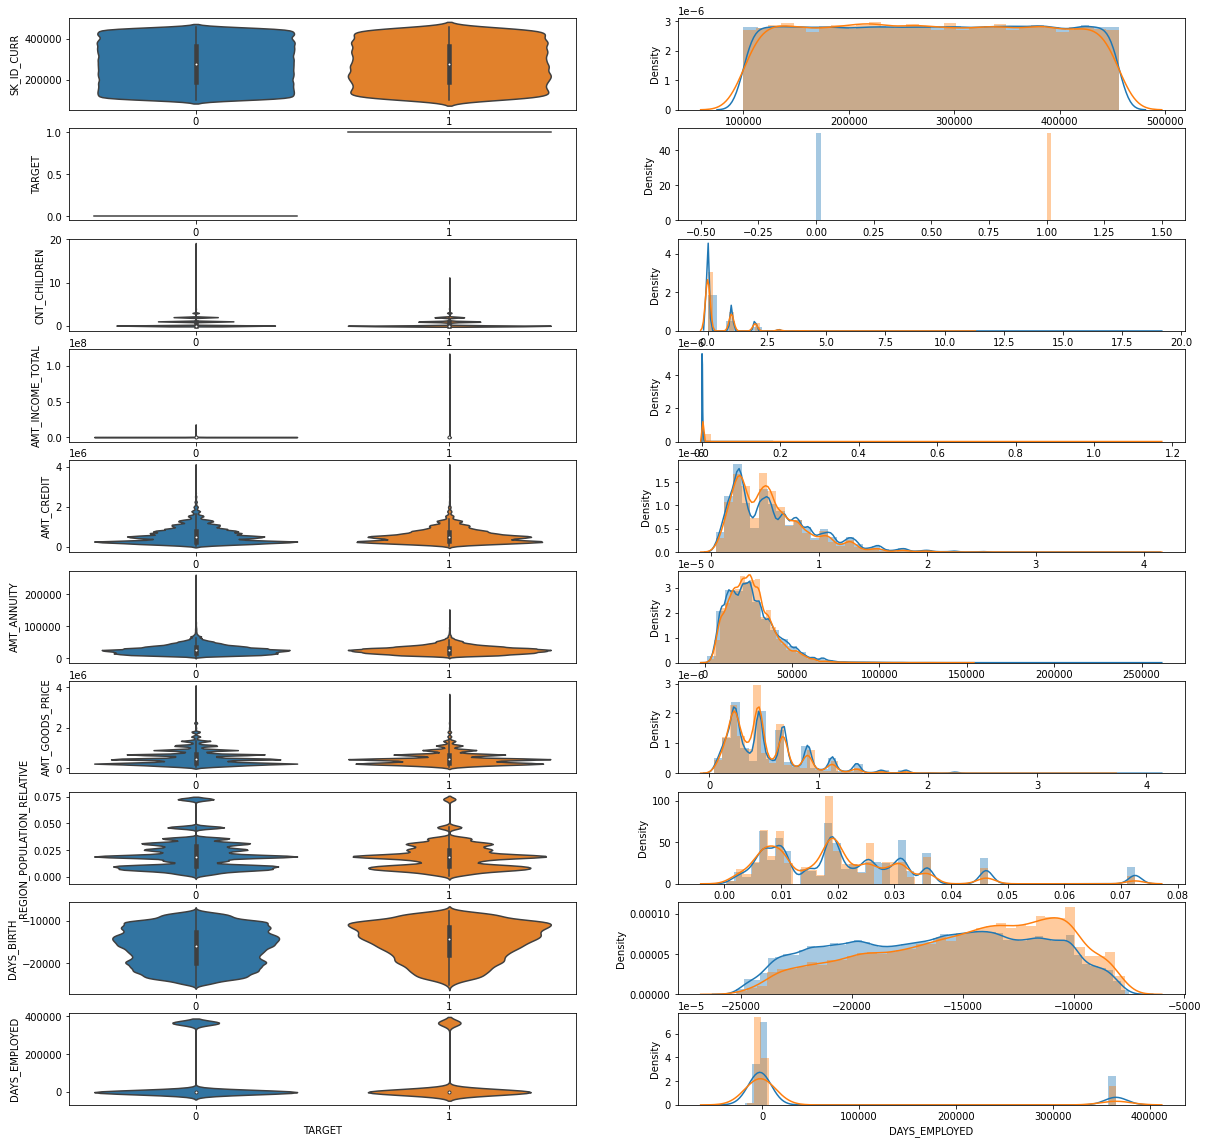

In [ ]:
# 너무길기때문에 10개만 가져와서 violinplot과 distplot으로 분포를 보겠다
n_features = n_features[:10]
fig, ax = plt.subplots(len(n_features), 2, figsize=(20,20))
cond_0 = app_train['TARGET'] == 0
cond_1 = app_train['TARGET'] == 1

for col_index in range(len(n_features)):
  sns.violinplot(x='TARGET', y=n_features[col_index], data=app_train, ax=ax[col_index][0])
  sns.distplot(app_train[cond_0][n_features[col_index]], ax=ax[col_index][1] )
  sns.distplot(app_train[cond_1][n_features[col_index]], ax=ax[col_index][1] )

In [ ]:
# 위의 코드들은 그냥 해본것이고 중요한 수치형변수를 가져와서 그려보겠다.
# 중요한 수치를 뽑아내는것은 feature_importance로 보던가 직접 찾아봐야한다
def show_hist_by_target(df, columns):
  cond_1 = (df['TARGET'] ==1)
  cond_0 = (df['TARGET'] ==0)

  for column in columns:
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=2, squeeze=False)
    #print('column name', column)
    sns.violinplot(x='TARGET', y=column, data=df, ax=ax[0][0])
    sns.distplot(df[cond_1][column], label='1', color='red', ax=ax[0][1])
    sns.distplot(df[cond_0][column], label='0', color='blue', ax=ax[0][1])

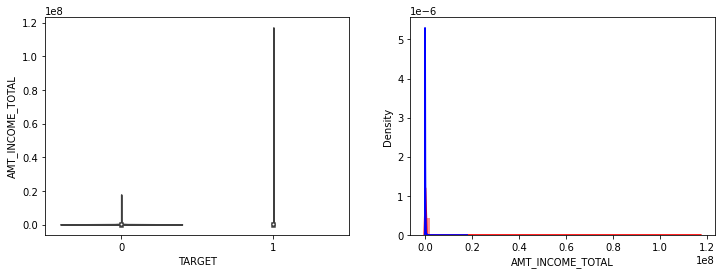

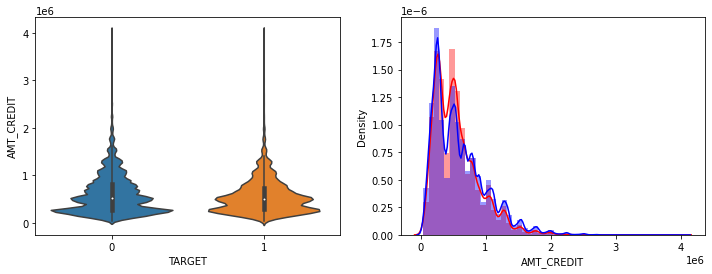

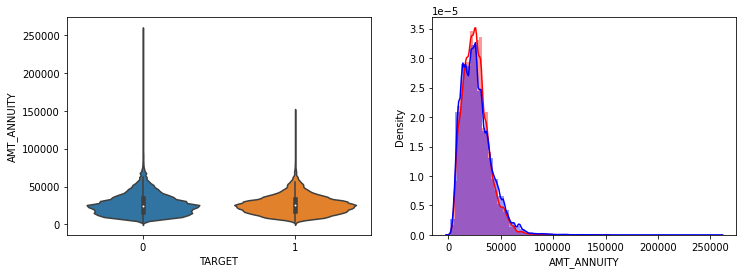

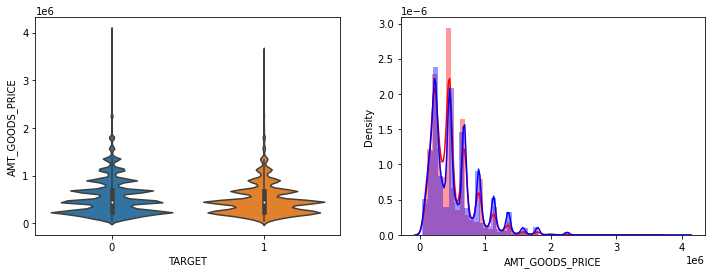

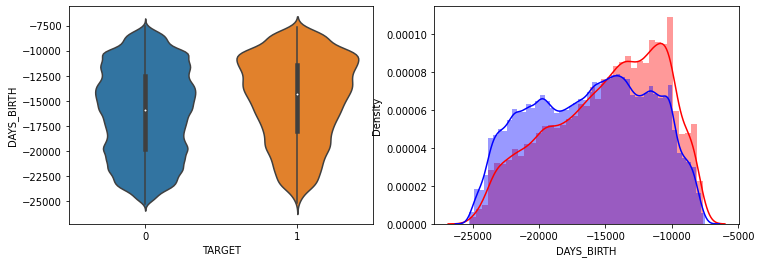

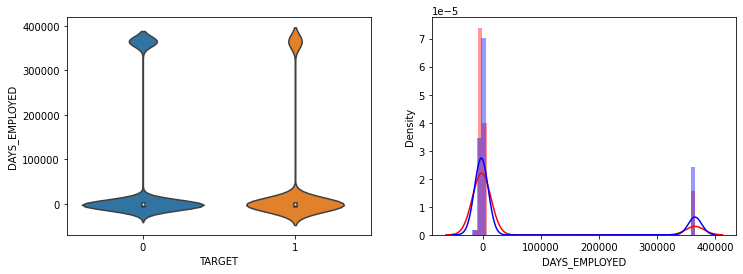

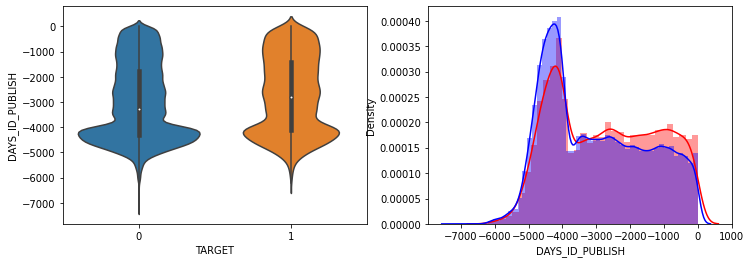

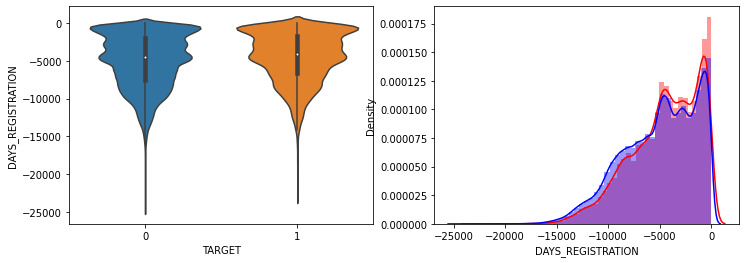

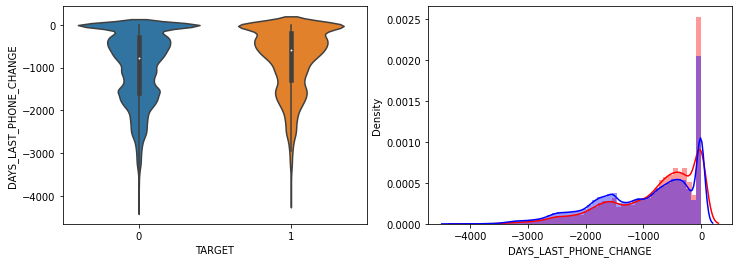

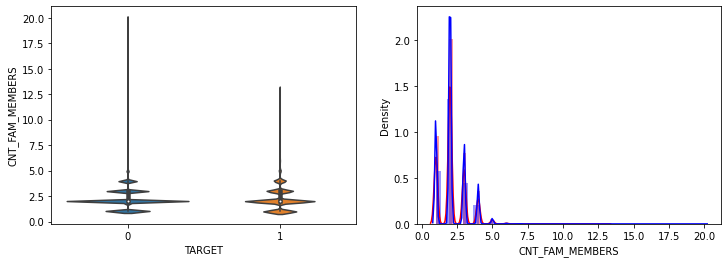

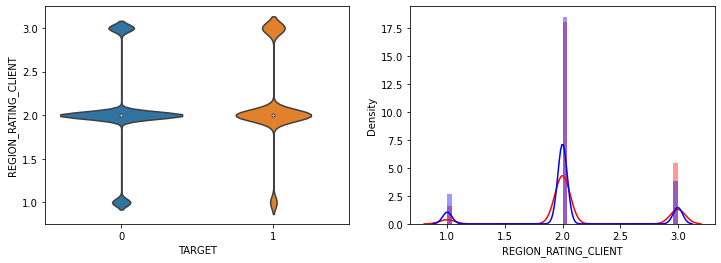

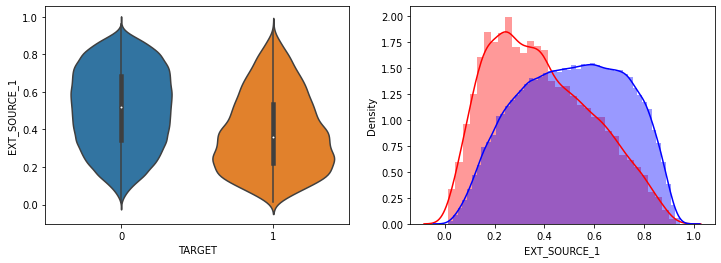

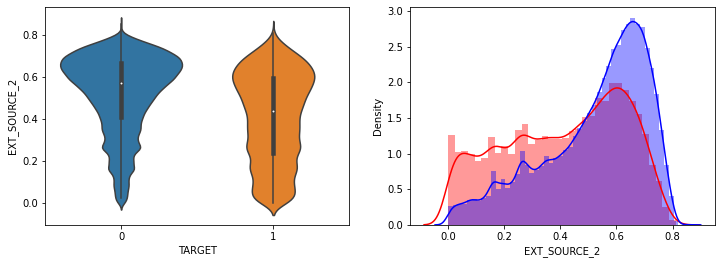

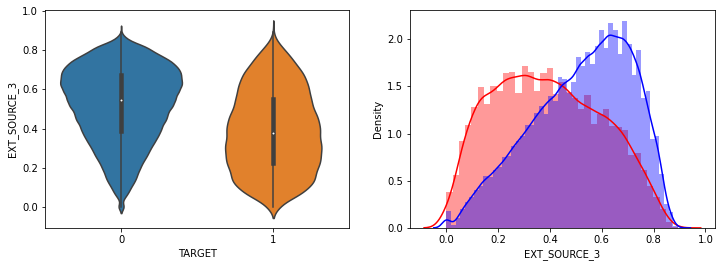

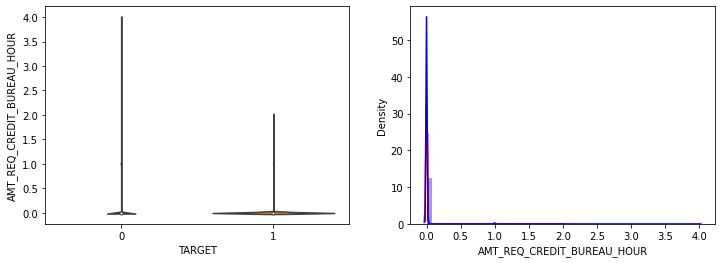

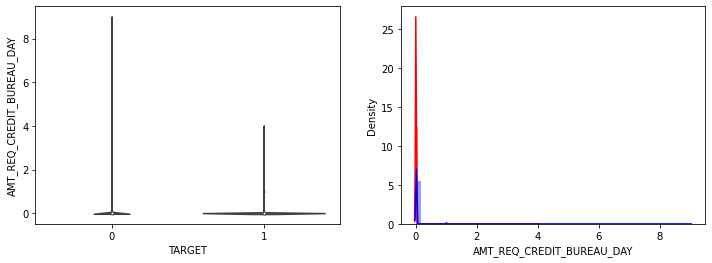

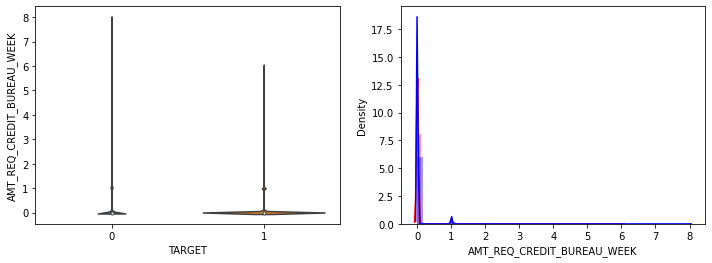

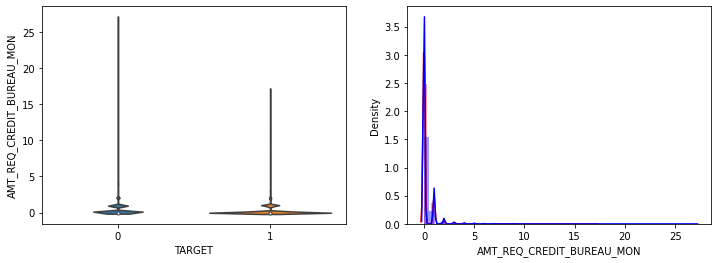

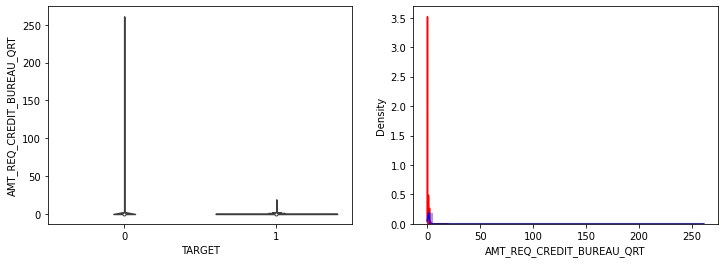

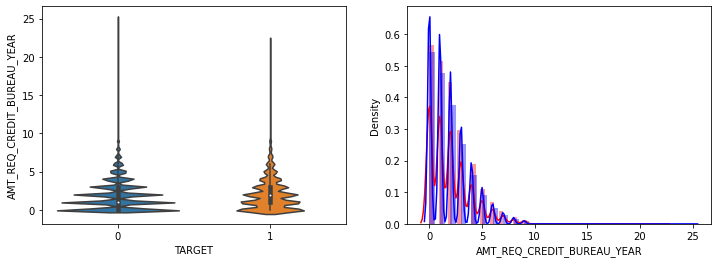

In [ ]:

# 중요한 수치를 뽑아내는것은 feature_importance로 보던가 직접 찾아봐야한다
columns = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
           'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 
           'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

show_hist_by_target(app_train, columns)

* AMT_INCOME_TOTAL, AMT_CREDIT 은 크게 차이가 없음. 
* AMT_ANNUITY는 TARGET=1시 상대적으로 작은 숫자대의 값이 조금 많음. 
* AMT_GOOD_PRICE는 크게 차이가 없음. 
* DAYS_BIRTH는 TARGET=1시 적은 연령대의 숫자값이 상대적으로 많음. 
* DAYS_EMPLOYED는 TARGET=1시 작은 값들이 조금 더 많음. 
* DAYS_ID_PUBLISH, DAYS_REGISTRATION  는 TARGET=1시 최근 값들이 조금 더 많음. 
* DAYS_LAST_PHONE_CHANGE는 큰 차이 없음. 
* CNT_FAM_MEMBERS는 차이가 없음. outlier 때문에 histogram에 차이가 있어 보임. 
* REGION_RATING_CLIENT는 큰 차이 없음 
* EXT_SOURCE_1,EXT_SOURCE_2, EXT_SOURCE_3 모두 조금씩 차이가 있음.  
* 나머지 컬럼모두 큰 차이가 없음. 
* 전반적으로 연령대가 낮은(직장 경력이 적은), 소액 대출에서 상대적으로 연체 비중이 높음.  

#### seaborn의 countplot() 또는 catplot()을 이용하여 category 피처(object 컬럼)을 TARGET 유형에 따라 Count 비교
seaborn은 카테고리값에 대해서는 distplot을 사용할 수 없다(연속형만 가능)     
카테고리값은 countplot으로 확인     
hist를 사용하면 카테고리값들이나 수치형이나 사용이 가능하다

In [ ]:
object_columns = app_train.dtypes[app_train.dtypes == 'object'].index.to_list()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

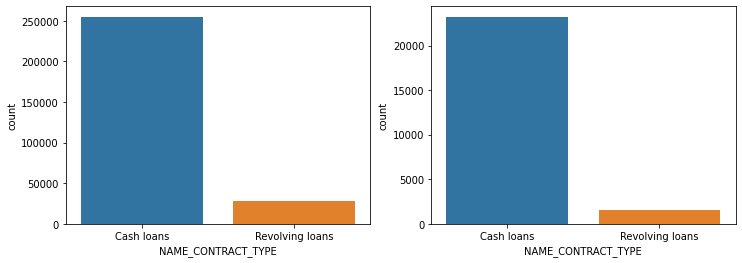

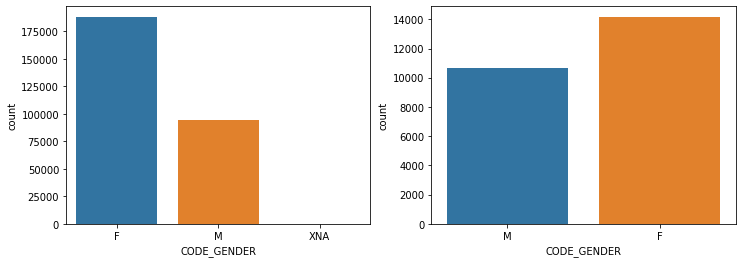

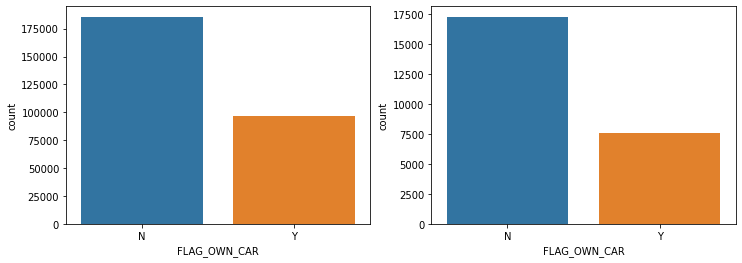

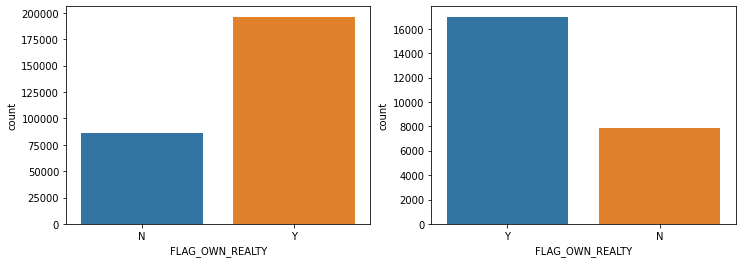

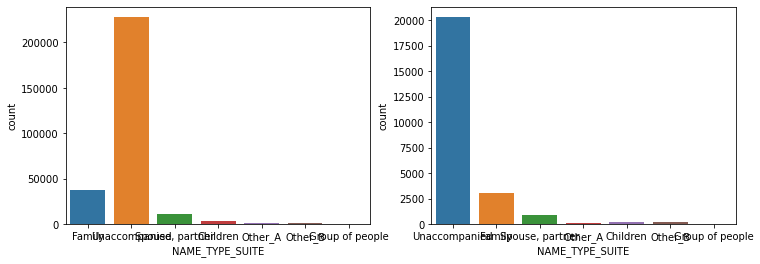

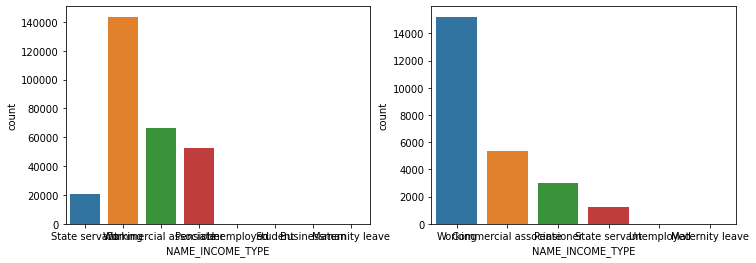

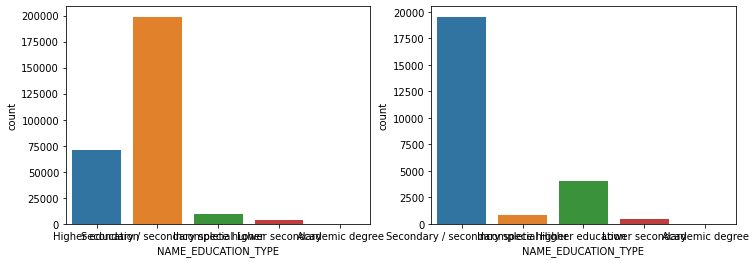

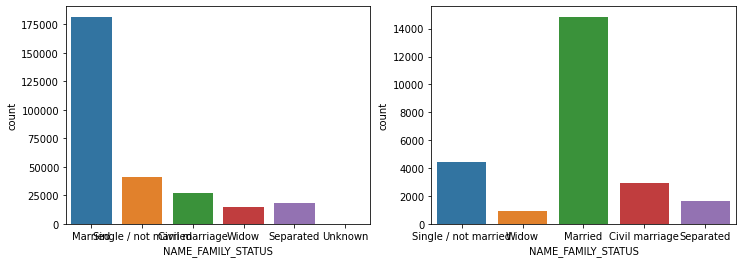

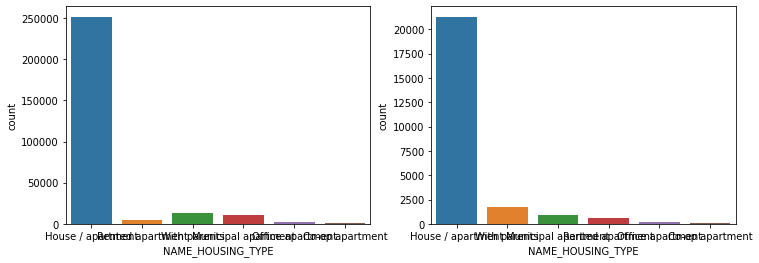

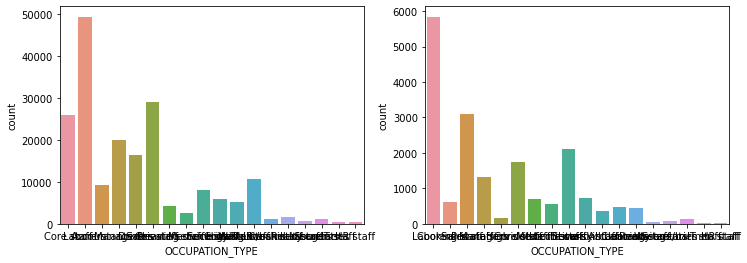

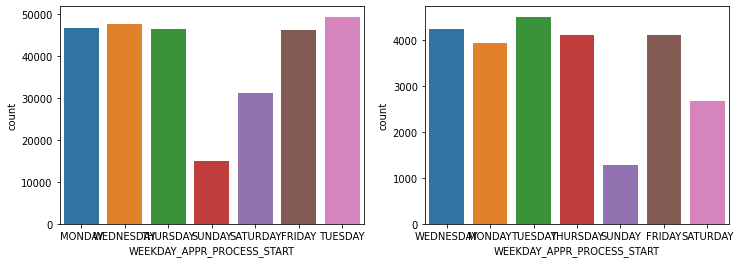

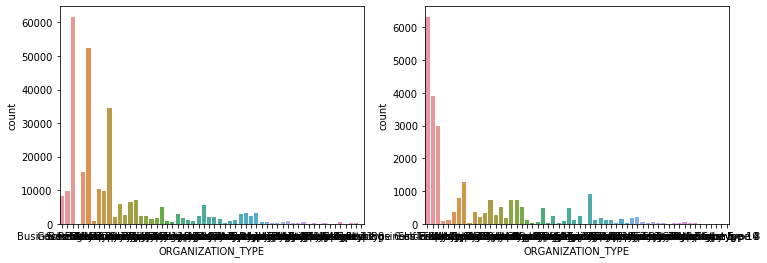

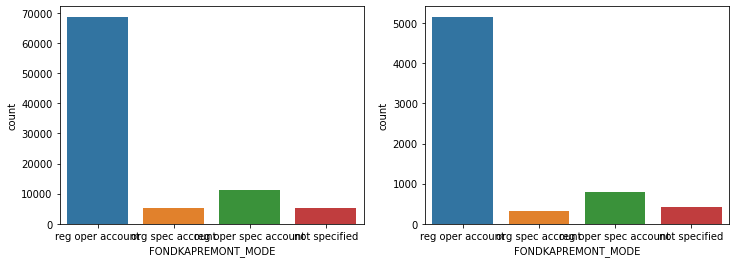

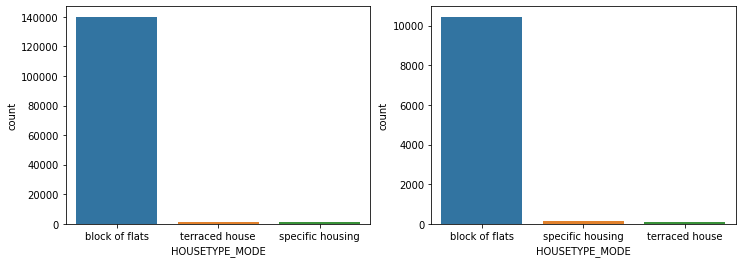

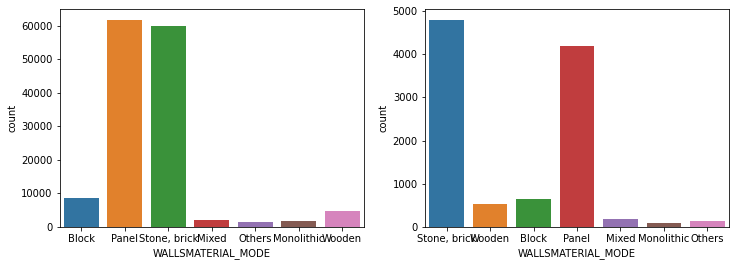

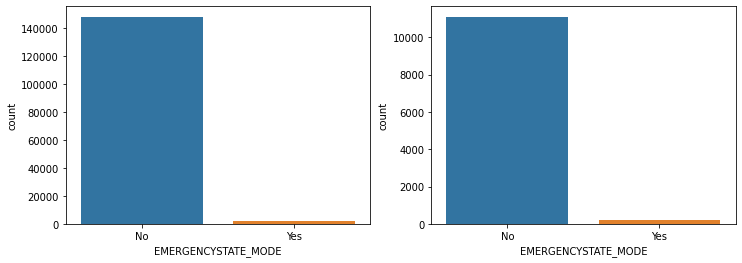

In [ ]:
def show_count_by_target(df, columns):
  cond_1 = (df['TARGET'] ==1)
  cond_0 = (df['TARGET'] ==0)

  for column in columns:
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=2, squeeze=False)
    sns.countplot(df[cond_0][column], ax=ax[0][0])
    sns.countplot(df[cond_1][column], ax=ax[0][1])

show_count_by_target(app_train, object_columns)

이런식으로 countplot으로 비교하면 막대 색이 바뀌는등 보기 불편한 경우가 생긴다    
subplot으로 서로 비교를 할때 catplot을 사용하면 편하다

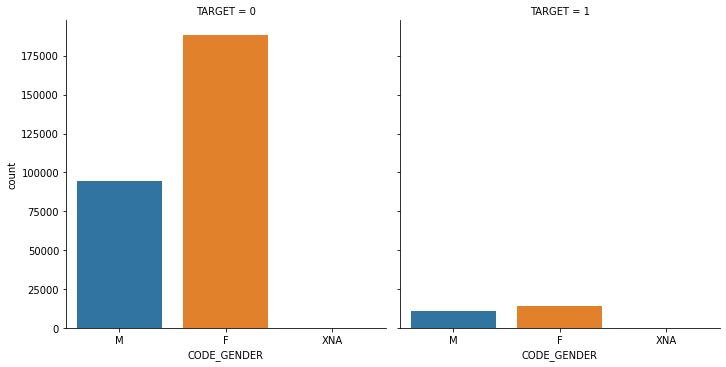

In [ ]:
# col로 지정한 카테고리값에 따라 그래프를 나누어 보여준다, 
# kind로 그래프 종류 지정가능
sns.catplot(x='CODE_GENDER', col='TARGET', data=app_train, kind='count')

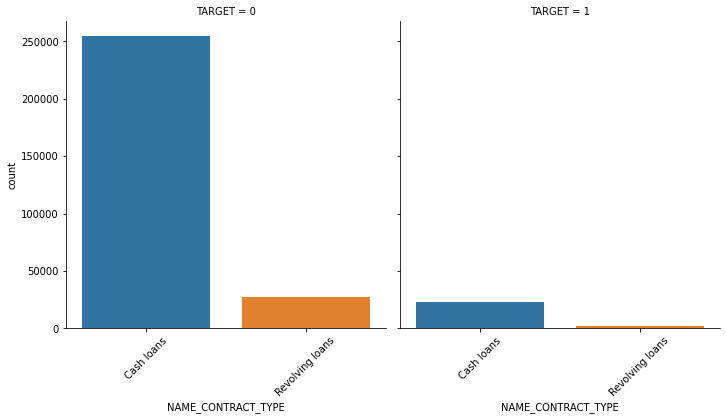

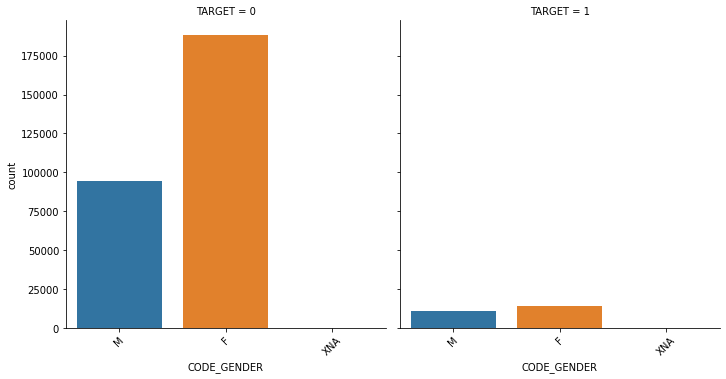

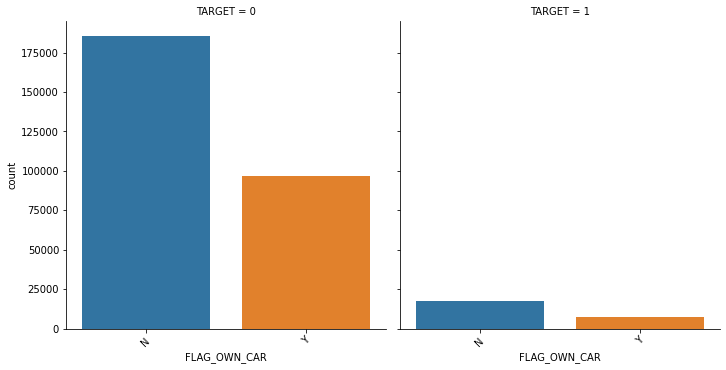

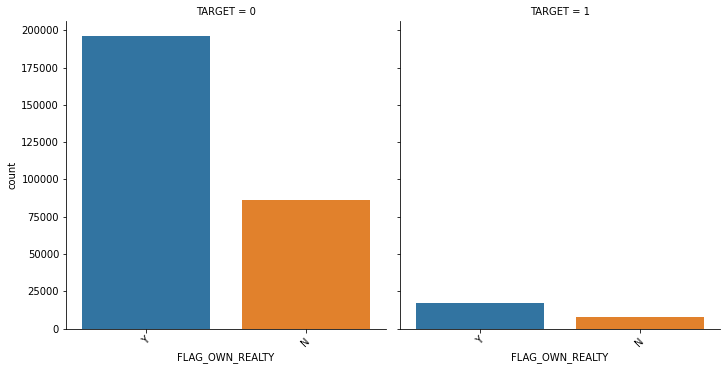

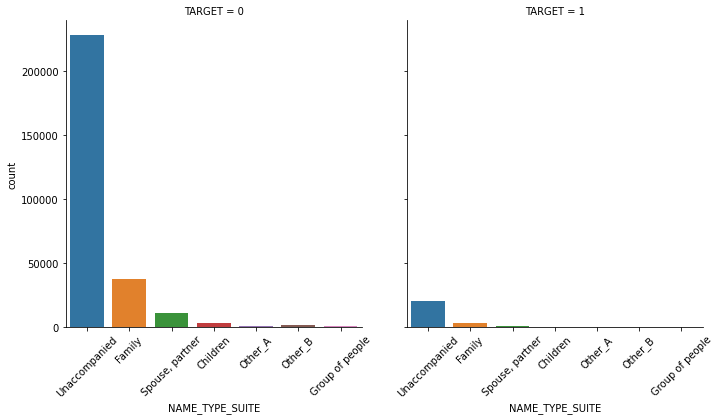

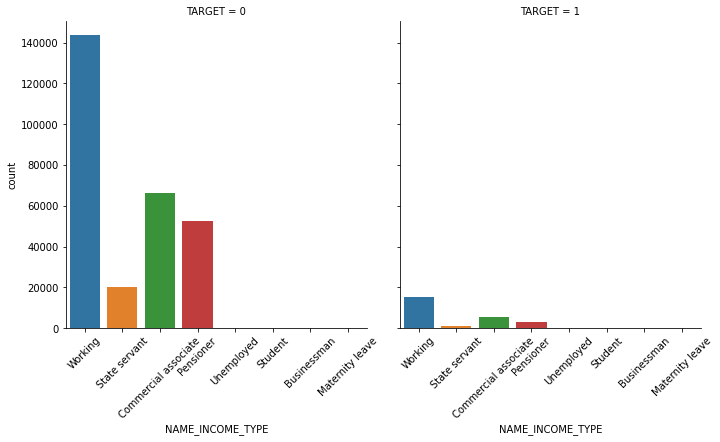

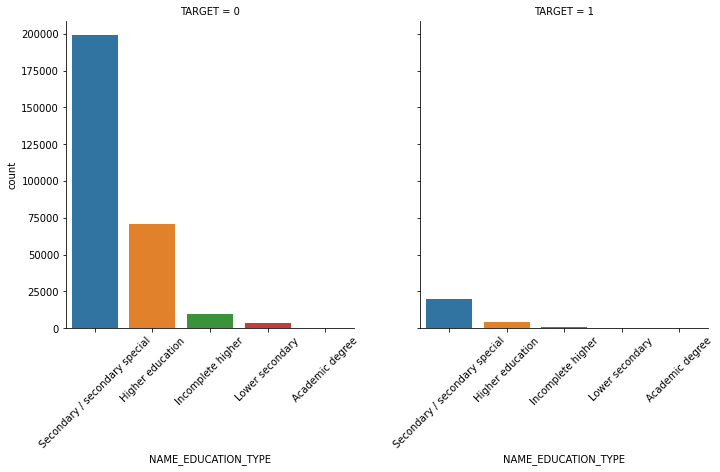

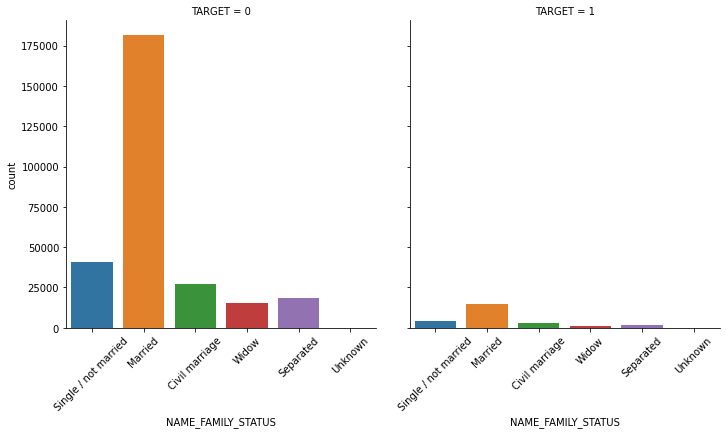

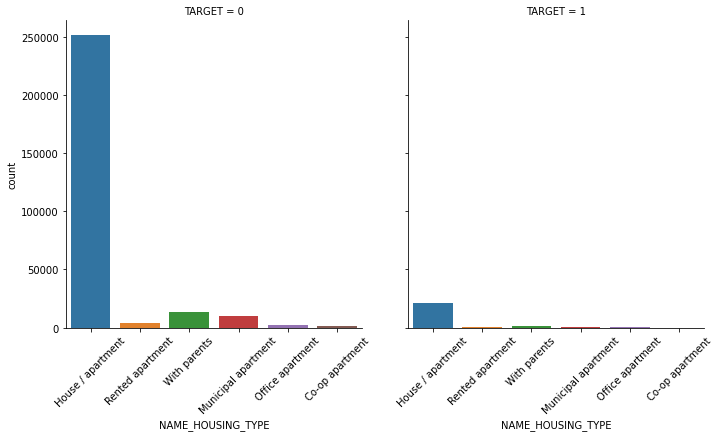

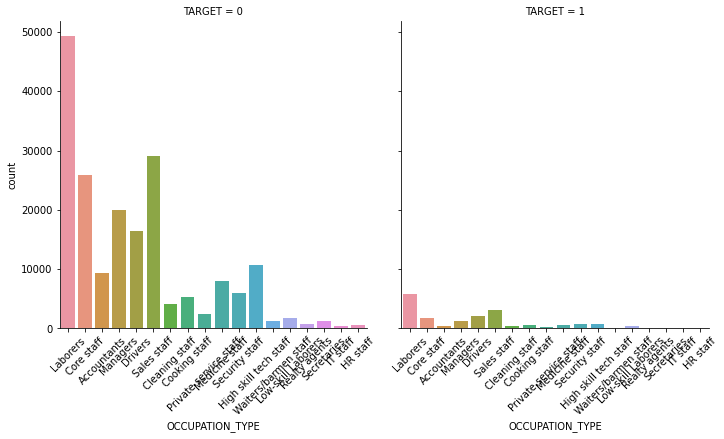

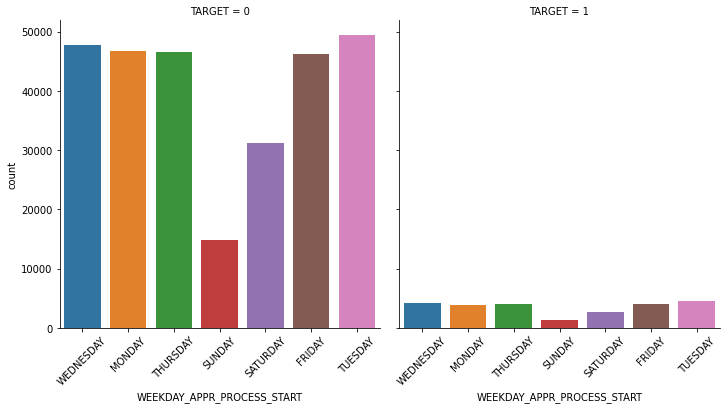

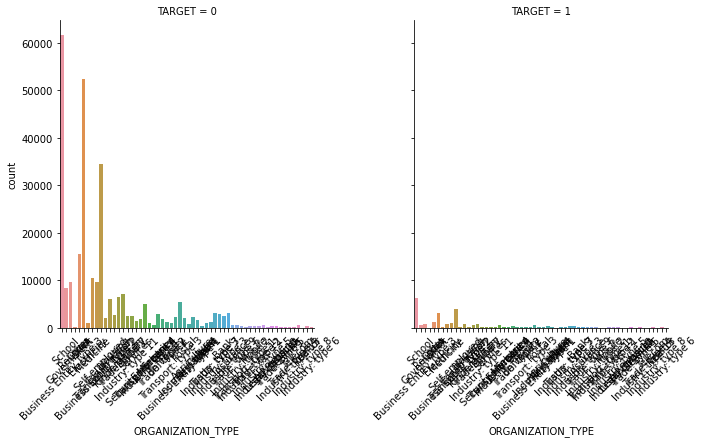

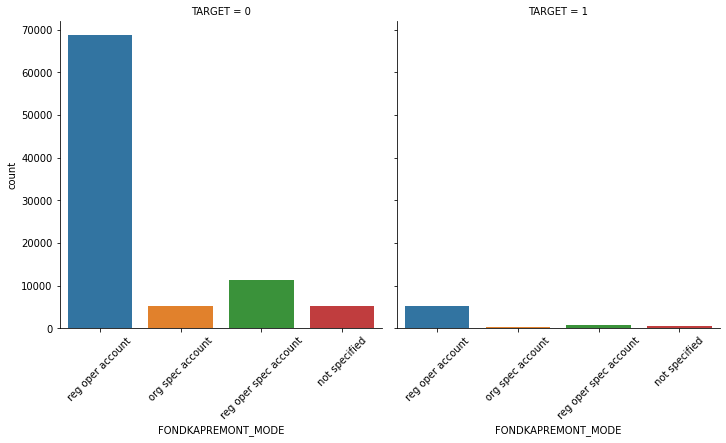

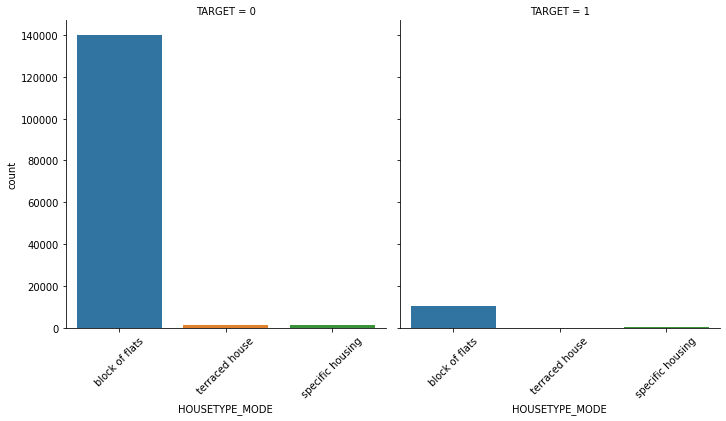

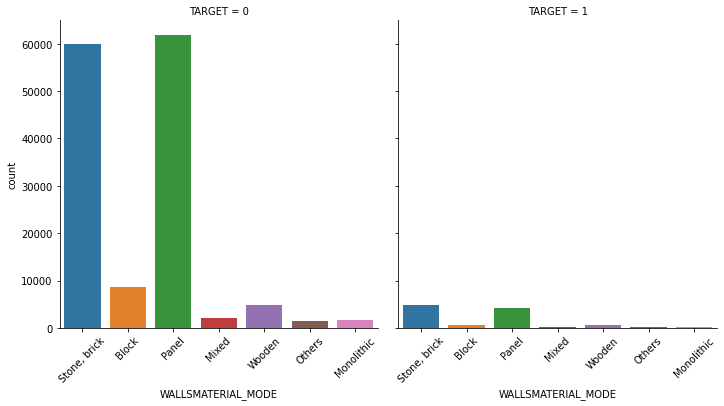

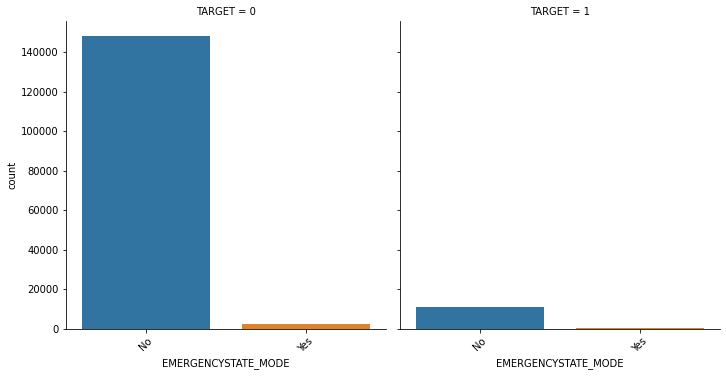

In [ ]:
def show_category_by_target(df, columns):
  for column in columns:
    chart=sns.catplot(x=column, col='TARGET', data= app_train, kind='count')
    chart.set_xticklabels(rotation=45)

show_category_by_target(app_train, object_columns)

#### 대출 횟수 대비 연체 비율(CODE_GENDER)이 남성이 여성보다 높음. 이를 value_counts()로 확인. 

In [ ]:
all_code_gender = app_train['CODE_GENDER'].value_counts().to_frame()
all_code_gender

,CODE_GENDER
F,202448
M,105059
XNA,4


In [ ]:
target_code_gender = app_train[app_train['TARGET'] == 1]['CODE_GENDER'].value_counts().to_frame()
target_code_gender

,CODE_GENDER
F,14170
M,10655


In [ ]:
data = pd.concat([all_code_gender,target_code_gender], axis=1)
data.columns= ['CODE_GENDER_ALL','CODE_GENDER_TARGET']
data['CODE_GENDER_RATIO'] = data['CODE_GENDER_TARGET'] / data['CODE_GENDER_ALL'] * 100
data

,CODE_GENDER_ALL,CODE_GENDER_TARGET,CODE_GENDER_RATIO
F,202448,14170.0,6.999328
M,105059,10655.0,10.141920
XNA,4,NaN,NaN


대출건수 대비 연체된 비율은 남성이 더 높다

#### 주요 컬럼들의 target과의 상관도 분석

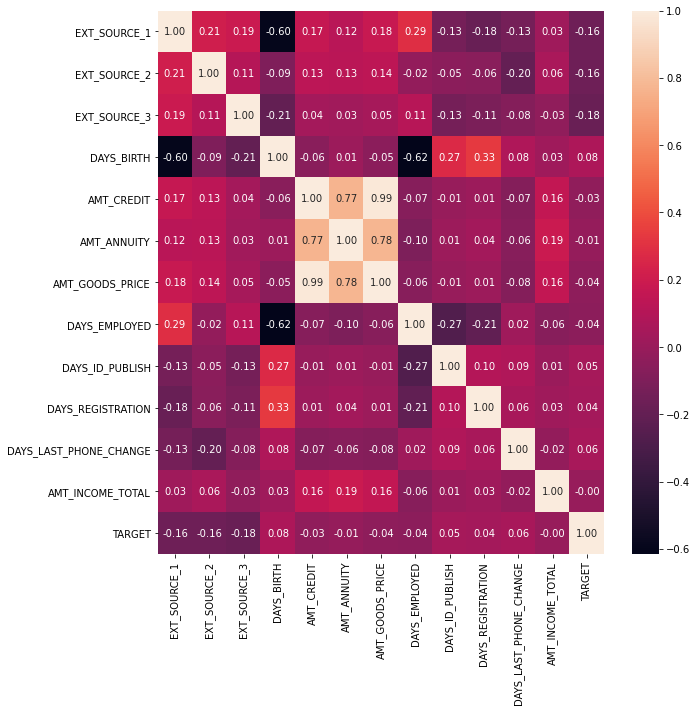

In [ ]:
corr_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
               'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'TARGET']

plt.figure(figsize = (10,10))
sns.heatmap(app_train[corr_columns].corr(), annot=True, fmt= '0.2f')

#### 이상치 데이터 확인 및 DAYS_EMPLOYED 이상치 값 변경 

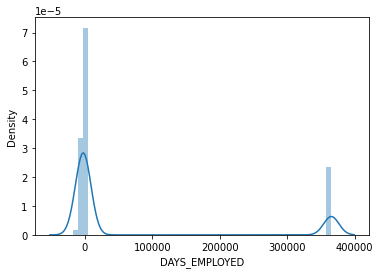

In [ ]:
sns.distplot(app_train['DAYS_EMPLOYED'])

In [ ]:
app_train['DAYS_EMPLOYED'].value_counts()
# 365243이라는 값이 55374개나왔다. 쓰레기값은 아닌것 같지만 해당데이터가
# 예측을 어렵게함으로 null처리를 하겠다

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [ ]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(365243, np.nan)
app_train['DAYS_EMPLOYED'].value_counts(dropna=False)

 NaN        55374
-200.0        156
-224.0        152
-199.0        151
-230.0        151
            ...  
-8868.0         1
-13006.0        1
-10261.0        1
-14079.0        1
-9062.0         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

### 주요 Feature들에 대한 feature engineering 수행

#### EXT_SOURCE 계열값 확인, EXT_SOURCE_X 피처들의 평균/최대/최소/표준편차 확인 

In [ ]:
app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [ ]:
app_train['EXT_SOURCE_1'].value_counts(dropna=False)

NaN         173378
0.546426         5
0.598469         5
0.499002         5
0.605152         5
             ...  
0.381263         1
0.259241         1
0.116346         1
0.171978         1
0.844540         1
Name: EXT_SOURCE_1, Length: 114585, dtype: int64

In [ ]:
app_train['EXT_SOURCE_2'].value_counts(dropna=False)

0.285898    721
NaN         660
0.262258    417
0.265256    343
0.159679    322
           ... 
0.383020      1
0.786006      1
0.256132      1
0.297243      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119832, dtype: int64

In [ ]:
app_train['EXT_SOURCE_3'].value_counts(dropna=False)

NaN         60965
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.887664        1
0.879506        1
0.020311        1
0.849170        1
0.014556        1
Name: EXT_SOURCE_3, Length: 815, dtype: int64

In [ ]:
# EXT_SOURCE_X 피처들의 평균/최대/최소/표준편차 확인 
print('### mean ###\n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean())
print('### max ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max())
print('### min ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].min())
print('### std ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std())

### mean ###
 EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64
### max ###
 EXT_SOURCE_1    0.962693
EXT_SOURCE_2    0.855000
EXT_SOURCE_3    0.896010
dtype: float64
### min ###
 EXT_SOURCE_1    1.456813e-02
EXT_SOURCE_2    8.173617e-08
EXT_SOURCE_3    5.272652e-04
dtype: float64
### std ###
 EXT_SOURCE_1    0.211062
EXT_SOURCE_2    0.191060
EXT_SOURCE_3    0.194844
dtype: float64


#### 데이터 가공 전 학습과 테스트용 데이터 세트 결합

In [ ]:
apps = pd.concat([app_train, app_test])
print(apps.shape)

(356255, 122)


#### EXT_SOURCE_X FEATURE 가공
* EXT_SOURCE_X 피처들을 결합하여 평균과 표준 편차를 신규 생성. 

In [ ]:
apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)

In [ ]:
apps.iloc[:, -2:].head(10) # 표준편차의 값은 결측치가있으면 nan이 된다

,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD
0,0.161787,0.092026
1,0.466757,0.219895
2,0.642739,0.122792
3,0.650442,NaN
4,0.322738,NaN
5,0.487726,0.188799
6,0.663607,0.150717
7,0.627467,0.122771
8,0.514935,0.280096
9,0.746644,NaN


In [ ]:
# APPS_EXT_SOURCE_STD가 결측치가 많으니 평균으로 넣어버리겠다.
apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())

#### AMT_CREDIT 비율로 Feature 가공
여러변수를 대출금액대비 비율로 가공

In [ ]:
apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_CREDIT']
apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_CREDIT']
apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']

#### AMT_INCOME_TOTAL 비율로 Feature 가공

In [ ]:
# AMT_INCOME_TOTAL 비율로 대출 금액 관련 피처 가공
apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']
apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']
apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']
# 가족수를 고려한 가처분 소득 피처 가공. 
apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS']

#### DAYS_BIRTH, DAYS_EMPLOYED 비율로 Feature 가공.

In [ ]:
# DAYS_BIRTH, DAYS_EMPLOYED 비율로 소득/자산 관련 Feature 가공. 
apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']
apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']

#### 데이터 레이블 인코딩, NULL값은 LightGBM 내부에서 처리하도록 특별한 변경하지 않음. 

In [ ]:
object_columns = apps.dtypes[apps.dtypes== 'object'].index.to_list()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
pd.factorize(apps['CODE_GENDER'])

(array([0, 1, 0, ..., 1, 0, 1]), Index(['M', 'F', 'XNA'], dtype='object'))

In [ ]:
for col in object_columns:
  apps[col] = pd.factorize(apps[col])[0]

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 136 entries, SK_ID_CURR to APPS_CAR_EMPLOYED_RATIO
dtypes: float64(81), int64(55)
memory usage: 372.4 MB


#### 학습 데이터와 테스트 데이터 다시 분리

In [ ]:
# ~을하면 부정을 해준다. ~로 is not null을 구한다.
apps_train = apps[~apps['TARGET'].isnull()]
apps_test = apps[apps['TARGET'].isnull()]
apps.shape, apps_train.shape, apps_test.shape

((356255, 136), (307511, 136), (48744, 136))

#### 학습 데이터를 검증 데이터로 분리하고 LGBM Classifier로 학습 수행. 

In [ ]:
from sklearn.model_selection import train_test_split

ftr_app = apps_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
train_x.shape, valid_x.shape

((215257, 134), (92254, 134))

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 100, 
        early_stopping_rounds= 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.247527	training's auc: 0.759999	valid_1's binary_logloss: 0.249532	valid_1's auc: 0.749382
[200]	training's binary_logloss: 0.240419	training's auc: 0.780752	valid_1's binary_logloss: 0.245559	valid_1's auc: 0.759704
[300]	training's binary_logloss: 0.235847	training's auc: 0.794946	valid_1's binary_logloss: 0.244186	valid_1's auc: 0.763743
[400]	training's binary_logloss: 0.2321	training's auc: 0.806864	valid_1's binary_logloss: 0.243695	valid_1's auc: 0.765196
[500]	training's binary_logloss: 0.2288	training's auc: 0.817393	valid_1's binary_logloss: 0.243586	valid_1's auc: 0.765379
[600]	training's binary_logloss: 0.225638	training's auc: 0.827276	valid_1's binary_logloss: 0.243474	valid_1's auc: 0.765683
[700]	training's binary_logloss: 0.22271	training's auc: 0.835886	valid_1's binary_logloss: 0.243401	valid_1's auc: 0.765848
[800]	training's binary_logloss: 0.219855	training's auc: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=-1,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

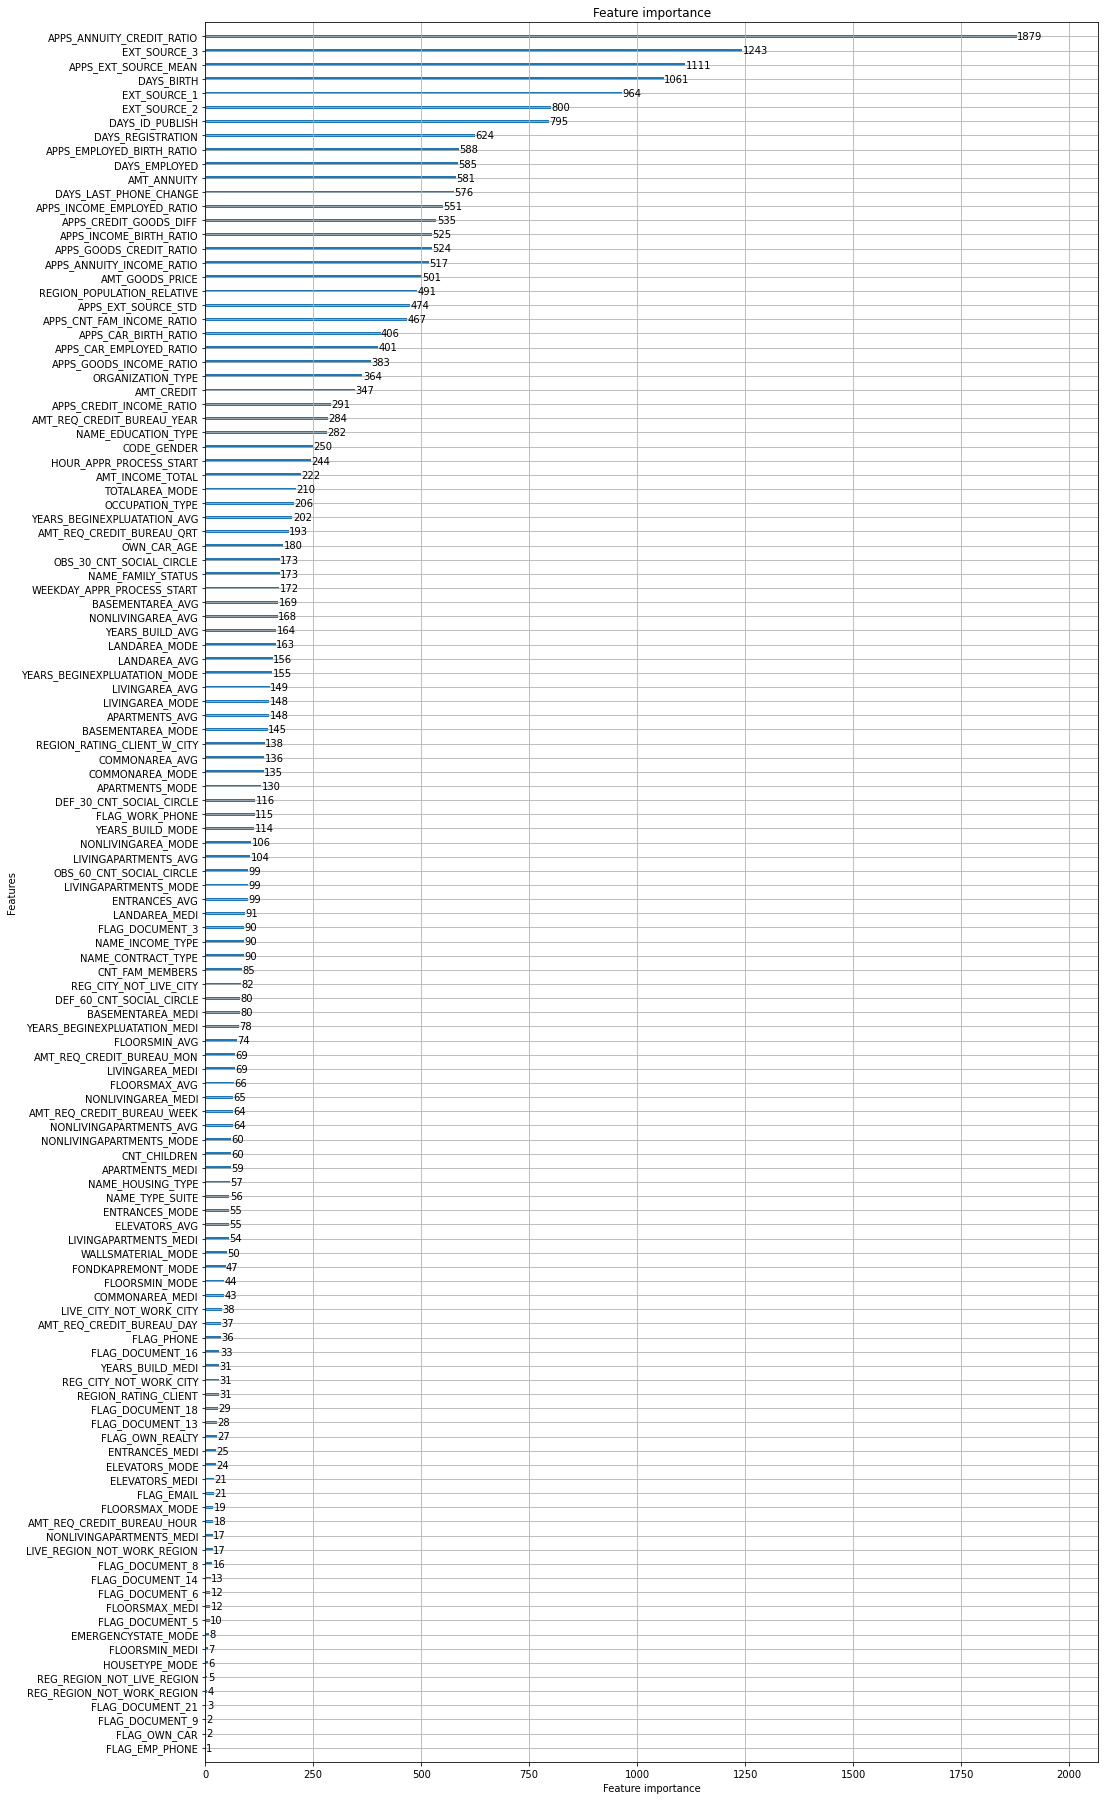

In [ ]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

#### 학습된 Classifier를 이용하여 테스트 데이터 예측하고 결과를 Kaggle로 Submit 수행. 

In [ ]:
preds = clf.predict_proba(apps_test.drop(['SK_ID_CURR', 'TARGET'], axis=1))[:, 1 ]
app_test['TARGET'] = preds

##### 코랩 버전은 Google Drive로 예측 결과 CSV를 생성.

In [ ]:
# import os, sys 
# from google.colab import drive 

# drive.mount('/content/gdrive')

In [ ]:
# SK_ID_CURR과 TARGET 값만 csv 형태로 생성. 코랩 버전은 구글 드라이브 절대 경로로 입력  
#default_dir = "/content/gdrive/My Drive"
default_dir = "/content"
app_test[['SK_ID_CURR', 'TARGET']].to_csv(os.path.join(default_dir,'apps_baseline_02_01.csv'), index=False)
# private: 0.75604, public: 0.75944 
# 68.87%